In [2]:
import numpy as np
import pandas as pd
from scipy import spatial

import warnings
warnings.filterwarnings('ignore')


from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import seaborn as  sns
import matplotlib.pyplot as plt
%matplotlib_inline

UsageError: Line magic function `%matplotlib_inline` not found.


In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 200)


How to Find Similar Users on the Basis of Ratings
To understand the concept of similarity, let’s create a simple dataset first.

The data includes four users A, B, C, and D, who have rated two movies. The ratings are stored in lists, and each list contains two numbers indicating the rating of each movie:

* Ratings by A are [1.0, 2.0].
* Ratings by B are [2.0, 4.0].
* Ratings by C are [2.5, 4.0].
* Ratings by D are [4.5, 5.0].

To start off with a visual clue, plot the ratings of two movies given by the users on a graph and look for a pattern. The graph looks like this:

In [59]:
a = [1, 2]
b = [2, 4]
c = [2.5, 4]
d = [4.5, 5]

labels = ["A", "B", "C", "D"]
data = np.append([a], [b], axis=0)
data = np.append(data, [c], axis=0)
data = np.append(data, [d], axis=0)

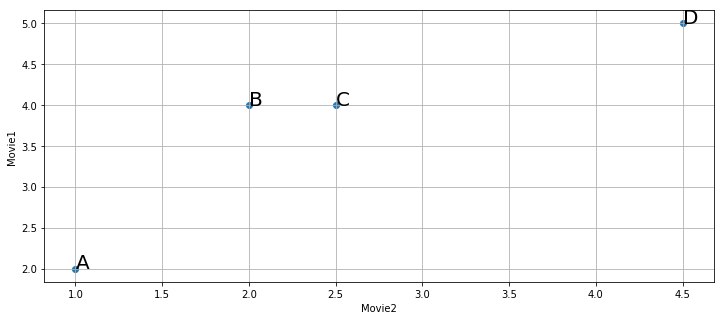

In [60]:
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(111)
ax.scatter(data[:, 0], data[:, 1])
ax.set_xlabel("Movie2")
ax.set_ylabel("Movie1")
for i, word in enumerate(data):
    ax.annotate(labels[i], xy=(data[i, 0]+0.001, data[i, 1]), size=20)
plt.grid(True)
plt.show()

In the graph above, each point represents a user and is plotted against the ratings they gave to two movies.

Looking at the distance between the points seems to be a good way to estimate similarity, right?

You can find the distance using the formula for Euclidean distance between two points. 

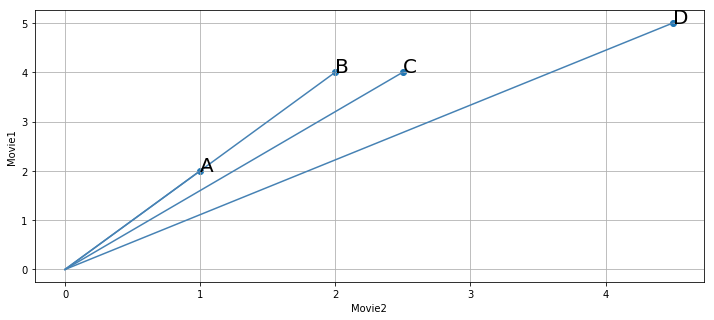

In [82]:
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(111)
ax.scatter(data[:, 0], data[:, 1])
ax.set_xlabel("Movie2")
ax.set_ylabel("Movie1")
for i, word in enumerate(data):
    ax.plot(np.array([0,data[i][0]]), np.array([0, data[i][1]]), color="steelblue")
    ax.annotate(labels[i], xy=(data[i, 0]+0.001, data[i, 1]), size=20)
plt.grid(True)
plt.show()

In [6]:
print("C-A:",spatial.distance.euclidean(c, a))
print("C-B:", spatial.distance.euclidean(c, b))
print("C-D:", spatial.distance.euclidean(c, d))

('C-A:', 2.5)
('C-B:', 0.5)
('C-D:', 2.23606797749979)


You could say C is closer to D in terms of distance. 
But looking at the rankings, it would seem that the choices of C would align with that of A more than D because both A and C like the second movie almost twice as much as they like the first movie, 
but D likes both of the movies equally.

So, what can you use to identify such patterns that Euclidean distance cannot? 

We will use cosine distance - angle between the lines joining the origin of the graph to the respective points.

You can use the cosine of the angle to find the similarity between two users. The higher the angle, the lower will be the cosine and thus, the lower will be the similarity of the users.
You can also inverse the value of the cosine of the angle to get the cosine distance between the users by subtracting it from 1.

In [7]:
print("C-A:", spatial.distance.cosine(c,a))
print("C-B:", spatial.distance.cosine(c,b))
print("C-D:", spatial.distance.cosine(c,d))
print("A-B:", spatial.distance.cosine(a,b))

('C-A:', 0.004504527406047898)
('C-B:', 0.004504527406047898)
('C-D:', 0.015137225946083022)
('A-B:', 0.0)


The lower angle between the vectors of C and A gives a lower cosine distance value. If you want to rank user similarities in this way, use cosine distance.

Notice that users A and B are considered absolutely similar in the cosine similarity metric despite having different ratings. 
This is actually a common occurrence in the real world, and the users like the user A are what you can call tough raters. 
An example would be a movie critic who always gives out ratings lower than the average, but the rankings of the items in their list would be similar to the Average raters like B.

To factor in such individual user preferences, you will need to bring all users to the same level by removing their biases. 
You can do this by subtracting the average rating given by that user to all items from each item rated by that user. 

The cosine of the angle between the adjusted vectors is called centered cosine. 
This approach is normally used when there are a lot of missing values in the vectors, and you need to place a common value to fill up the missing values.

### Model Based
The second category covers the Model based approaches, which involve a step to reduce or compress the large but sparse user-item matrix. For understanding this step, a basic understanding of dimensionality reduction can be very helpful.

#### Dimensionality Reduction
In the user-item matrix, there are two dimensions:

1.The number of users

2.The number of items

If the matrix is mostly empty, reducing dimensions can improve the performance of the algorithm in terms of both space and time.
You can use various methods like matrix factorization or autoencoders to do this.

Matrix factorization can be seen as breaking down a large matrix into a product of smaller ones. 
This is similar to the factorization of integers, where 12 can be written as 6 x 2 or 4 x 3. In the case of matrices, a matrix A with dimensions m x n can be reduced to a product of two matrices X and Y with dimensions m x p and p x n respectively.

#### Algorithms for Matrix Factorization
One of the popular algorithms to factorize a matrix is the singular value decomposition (SVD) algorithm.<br>
SVD came into the limelight when matrix factorization was seen performing well in the Netflix prize competition.<br>
Other algorithms include PCA and its variations, NMF, and so on. Autoencoders can also be used for dimensionality reduction in case you want to use Neural Networks.
<hr>

### Using Python to Build Recommenders
There are quite a few libraries and toolkits in Python that provide implementations of various algorithms that you can use to build a recommender.<br>
But the one that you should try out while understanding recommendation systems is Surprise.

Surprise is a Python SciKit that comes with various recommender algorithms and similarity metrics to make it easy to build and analyze recommenders.


To use Surprise, you should first know some of the basic modules and classes available in it:

The Dataset module is used to load data from files, Pandas dataframes, or even built-in datasets available for experimentation. (MovieLens 100k is one of the built-in datasets in Surprise.) To load a dataset, some of the available methods are:

* Dataset.load_builtin()
* Dataset.load_from_file()
* Dataset.load_from_df()

The Reader class is used to parse a file containing ratings. The default format in which it accepts data is that each rating is stored in a separate line in the order user item rating.
This order and the separator can be configured using parameters:

* line_format is a string that stores the order of the data with field names separated by a space, as in "item user rating".
* sep is used to specify separator between fields, such as ','.
* rating_scale is used to specify the rating scale. The default is (1, 5).
* skip_lines is used to indicate the number of lines to skip at the beginning of the file. The default is 0.
Here’s a program that you can use to load data from a Pandas dataframe or the from builtin MovieLens 100k dataset:

In [8]:
from surprise import Dataset
from surprise import Reader

# This is the same data that was plotted for similarity earlier
# with one new user "E" who has rated only movie 1
ratings_dict = {
    "item": [1, 2, 1, 2, 1, 2, 1, 2, 1],
    "user": ['A', 'A', 'B', 'B', 'C', 'C', 'D', 'D', 'E'],
    "rating": [1, 2, 2, 4, 2.5, 4, 4.5, 5, 3],
}

df = pd.DataFrame(ratings_dict)
reader = Reader(rating_scale=(1, 5))

# Loads Pandas dataframe
data = Dataset.load_from_df(df[["user", "item", "rating"]], reader)
# Loads the builtin Movielens-100k data
movielens = Dataset.load_builtin('ml-100k')

Dataset ml-100k could not be found. Do you want to download it? [Y/n] Y
Trying to download dataset from http://files.grouplens.org/datasets/movielens/ml-100k.zip...
Done! Dataset ml-100k has been saved to C:\Users\roma/.surprise_data/ml-100k


We will use Movies data set.

In [118]:
df = pd.read_csv("movies.csv")
movie_titles = pd.read_csv('movies_titles.csv') 
movielens = pd.merge(df, movie_titles, on='item_id') 

In [119]:
movielens.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [120]:
print("Data set size: " + str(movielens.shape))

Data set size: (100003, 5)


In [121]:
print("Number of unique films: " + str(len(movielens.title.unique())))

Number of unique films: 1664


In [122]:
print("Number of unique users id: " + str(len(movielens.user_id.unique())))

Number of unique users id: 944


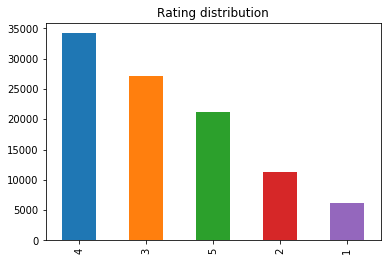

In [123]:
movielens.rating.value_counts().plot(kind='bar')
plt.title("Rating distribution")
plt.show()

Check Nan`s existance

In [124]:
movielens.isnull().sum()

user_id      0
item_id      0
rating       0
timestamp    0
title        0
dtype: int64

To load a dataset from a pandas dataframe, you will need the load_from_df() method.

You will also need a Reader object, but only the rating_scale the parameter must be specified the default rating_scaale is (2,5). 

The dataframe must have three columns, corresponding to the user (raw) ids, the item (raw) ids, and the ratings in this order.


The next step is splitting our dataset in train and test set in a ratio of 75%:25%

In [107]:
from surprise.model_selection import train_test_split
from surprise import Reader, Dataset

reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(movielens[['user_id', 'item_id', 'rating']], reader)

trainset, testset = train_test_split(data, test_size=0.25)

I’ll be using the famous SVD algorithm, as popularized by Simon Funk during the Netflix Prize. 
SVD is a Matrix Factorization techniques.

In [108]:
from surprise import SVD, accuracy

algo = SVD()
algo.fit(trainset)

predictions = algo.test(testset)

#### Evaluation

Singular vector decomposition (SVD) shown here employs the use of gradient descent to minimize the squared error between predicted rating and actual rating, eventually getting the best model.

In [109]:
accuracy.rmse(predictions)

RMSE: 0.9417


0.941706998256662

Also, we can perform Cross-validation and heavy hyperparameters tuning with surprise to get more accurate predictions.

### Algorithms Based on K-Nearest Neighbours (k-NN)

For the memory-based approaches, the algorithm that would fit the bill is Centered k-NN because the algorithm is very close to the centered cosine similarity formula explained above.

It is available in Surprise as KNNWithMeans.

To find the similarity, you simply have to configure the function by passing a dictionary as an argument to the recommender function.

The dictionary should have the required keys, such as the following:

* name contains the similarity metric to use. Options are cosine, msd, pearson, or pearson_baseline. The default is msd.
* user_based is a boolean that tells whether the approach will be user-based or item-based. The default is True, which means the user-based approach will be used.
* min_support is the minimum number of common items needed between users to consider them for similarity. For the item-based approach, this corresponds to the minimum number of common users for two items.


In [33]:
from surprise import KNNWithMeans

# To use item-based cosine similarity
sim_options = {
    "name": "cosine",
    "user_based": False,  # Compute  similarities between items
}
algo = KNNWithMeans(sim_options=sim_options)

In [34]:
algo.fit(trainset)

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [37]:
prediction = algo.predict('E', 2)

In [38]:
prediction.est

3.5281725820644785

The algorithm predicted that the user E would rate the movie 3.52, which could be high enough to be shown as a recommendation.

<hr>

### Tuning the Algorithm Parameters for KNN

Surprise provides a GridSearchCV class analogous to GridSearchCV from scikit-learn.

In [41]:
from surprise.model_selection import GridSearchCV

sim_options = {
    "name": ["msd", "cosine"],
    "min_support": [3, 4, 5],
    "user_based": [False, True],
}

algo = KNNWithMeans()
param_grid = {"sim_options": sim_options}

gs = GridSearchCV(algo, param_grid, measures=["rmse", "mae"], cv=3)
gs.fit(data)

print(gs.best_score["rmse"])
print(gs.best_params["rmse"])

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix.

So, for the MovieLens 100k dataset, Centered-KNN algorithm works best if you go with item-based approach and use msd as the similarity metric with minimum support 3.

Similarly, for model-based approaches, we can use Surprise to check which values for the following factors work best:

* n_epochs is the number of iterations of SGD, which is basically an iterative method used in Statistics to minimize a function.
* lr_all is the learning rate for all parameters, which is a parameter that decides how much the parameters are adjusted in each iteration.
* reg_all is the regularization term for all parameters, which is a penalty term added to prevent overfitting.

<hr>

### Tuning the Algorithm Parameters for SVD


In [43]:
param_grid = {
    "n_epochs": [5, 10],
    "lr_all": [0.002, 0.005],
    "reg_all": [0.4, 0.6]
}

algo = SVD()
gs = GridSearchCV(SVD, param_grid, measures=["rmse", "mae"], cv=3)

gs.fit(data)

print(gs.best_score["rmse"])
print(gs.best_params["rmse"])

0.9642233625216031
{'lr_all': 0.005, 'reg_all': 0.4, 'n_epochs': 10}


So, for the MovieLens 100k dataset, the SVD algorithm works best if you go with 10 epochs and use a learning rate of 0.005 and 0.4 regularization.

<hr>

### Use correlation analysis for recomendations

Calculate mean rating of all movies 

Calculate count rating of all movies 

In [84]:
# Calculate mean rating of all movies 
movielens.groupby('title')['rating'].mean().sort_values(ascending=False).head() 

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

In [86]:
# Calculate count rating of all movies 
movielens.groupby('title')['rating'].count().sort_values(ascending=False).head() 

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

creating dataframe with 'rating' count values 

In [87]:
# creating dataframe with 'rating' count values 
ratings = pd.DataFrame(movielens.groupby('title')['rating'].mean())  
  
ratings['num of ratings'] = pd.DataFrame(movielens.groupby('title')['rating'].count()) 
  
ratings.head() 

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


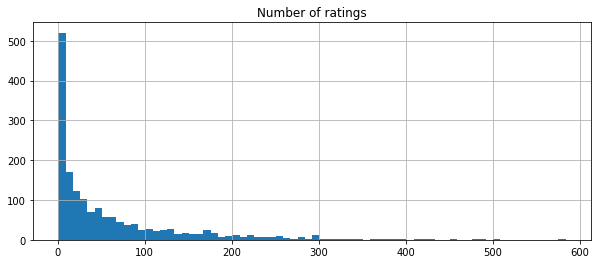

In [97]:
# plot graph of 'num of ratings column' 
plt.figure(figsize =(10, 4)) 
plt.title("Number of ratings")
ratings['num of ratings'].hist(bins = 70) 

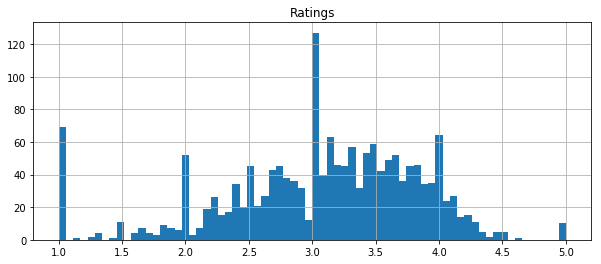

In [98]:
# plot graph of 'ratings' column 
plt.figure(figsize =(10, 4)) 
plt.title("Ratings")  
ratings['rating'].hist(bins = 70) 

In [99]:
# Sorting values according to  
# the 'num of rating column' 
moviemat = movielens.pivot_table(index ='user_id', 
              columns ='title', values ='rating') 


In [92]:
ratings.sort_values('num of ratings', ascending = False).head(10) 

,rating,num of ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


Analysing correlation with similar movies 

Star Wars (1977)

Liar Liar (1997)

In [93]:
# analysing correlation with similar movies 
starwars_user_ratings = moviemat['Star Wars (1977)'] 
liarliar_user_ratings = moviemat['Liar Liar (1997)'] 
  
starwars_user_ratings.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [94]:
# analysing correlation with similar movies 
similar_to_starwars = moviemat.corrwith(starwars_user_ratings) 
similar_to_liarliar = moviemat.corrwith(liarliar_user_ratings) 
  
corr_starwars = pd.DataFrame(similar_to_starwars, columns =['Correlation']) 
corr_starwars.dropna(inplace = True) 
  
corr_starwars.head() 

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


Similar movies like starwars 

In [95]:
# Similar movies like starwars 
corr_starwars.sort_values('Correlation', ascending = False).head(10) 
corr_starwars = corr_starwars.join(ratings['num of ratings']) 
  
corr_starwars.head() 
  
corr_starwars[corr_starwars['num of ratings']>100].sort_values('Correlation', ascending = False).head() 

,Correlation,num of ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


Similar movies as of liarliar 

In [96]:
# Similar movies as of liarliar 
corr_liarliar = pd.DataFrame(similar_to_liarliar, columns =['Correlation']) 
corr_liarliar.dropna(inplace = True) 
  
corr_liarliar = corr_liarliar.join(ratings['num of ratings']) 
corr_liarliar[corr_liarliar['num of ratings']>100].sort_values('Correlation', ascending = False).head() 

,Correlation,num of ratings
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137
